In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
import os
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [3]:
os.getcwd()

'C:\\Users\\WIN-7\\python_course\\Machine_Learning'

In [4]:
one=os.listdir(r'F:\Data Science and machine learning\logistic regression')
one

['Logistic Regression.html',
 'logistic_regression.pdf',
 'Titanictest.csv',
 'Titanictrain.csv']

In [5]:
Train = pd.read_csv(r'F:\Data Science and machine learning\logistic regression\Titanictrain.csv')

In [6]:
Test = pd.read_csv(r'F:\Data Science and machine learning\logistic regression\Titanictest.csv')

In [7]:
Train.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
Test.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Gender         418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
Train.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
Train.Survived.unique()

array([0, 1], dtype=int64)

In [15]:
Train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [16]:
Train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [17]:
Train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [18]:
Train.isnull()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Figure size 864x576 with 0 Axes>

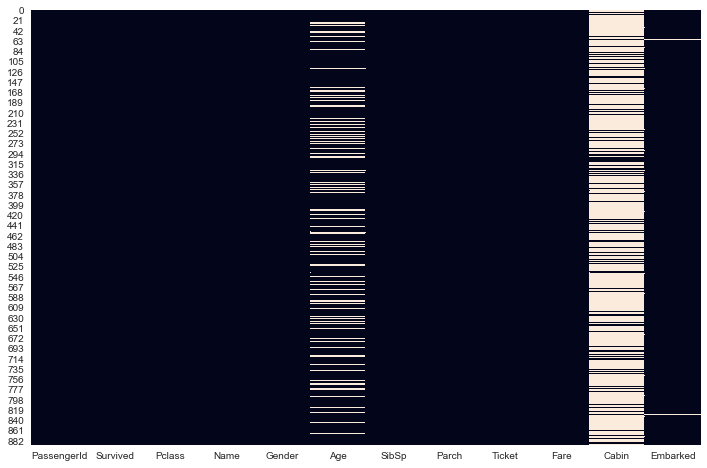

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(Train.isnull(),cbar=False)

In [21]:
np.round((Train.isnull().sum()/len(Train))*(100),2).astype(str)+'%'

PassengerId      0.0%
Survived         0.0%
Pclass           0.0%
Name             0.0%
Gender           0.0%
Age            19.87%
SibSp            0.0%
Parch            0.0%
Ticket           0.0%
Fare             0.0%
Cabin           77.1%
Embarked        0.22%
dtype: object

In [22]:
# Numerical variable analysis

In [23]:
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<Figure size 864x576 with 0 Axes>

(array([ 64., 115., 230., 155.,  86.,  42.,  17.,   5.]),
 array([ 0.42  , 10.3675, 20.315 , 30.2625, 40.21  , 50.1575, 60.105 ,
        70.0525, 80.    ]),
 <a list of 8 Patch objects>)

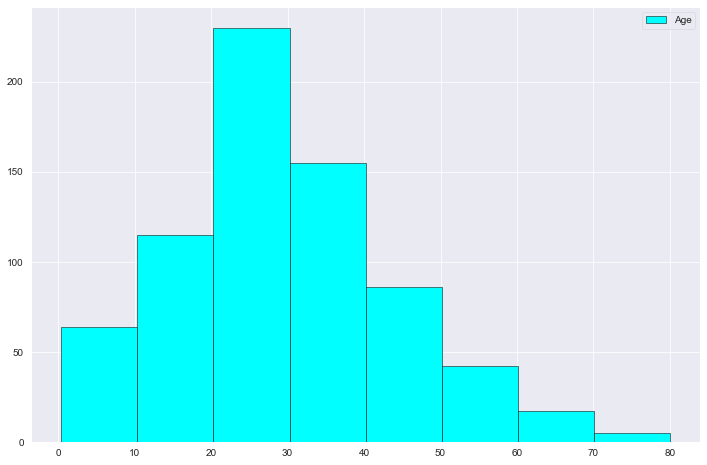

In [24]:
plt.figure(figsize=(12,8))
plt.hist(Train['Age'],bins=8,histtype='bar',align='mid',color='cyan',label='Age',edgecolor='black')
plt.legend(loc=0)

<Figure size 864x576 with 0 Axes>

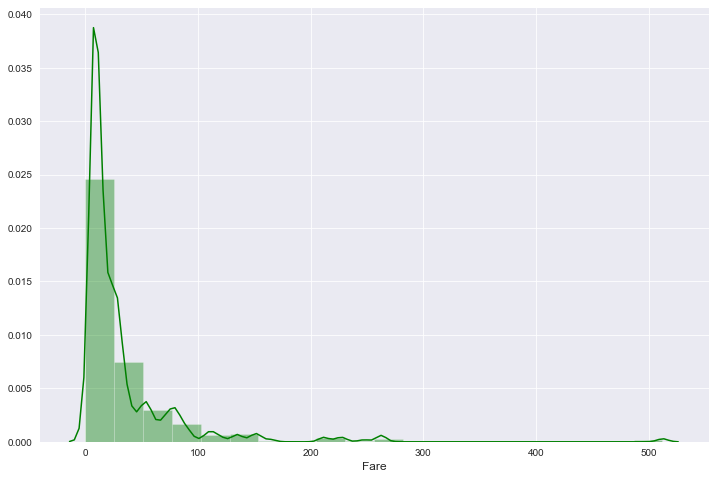

In [25]:
plt.figure(figsize=(12,8))
sns.distplot(Train.Fare,bins=20,color='green')

<Figure size 864x576 with 0 Axes>

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

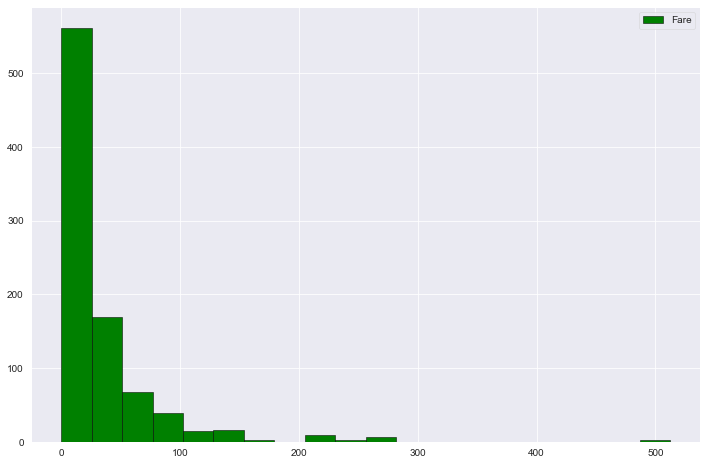

In [26]:
plt.figure(figsize=(12,8))
plt.hist(Train['Fare'],bins=20,histtype='bar',align='mid',color='green',label='Fare',edgecolor='black')
plt.legend(loc=0)


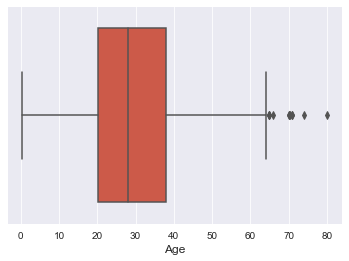

In [27]:
sns.boxplot(Train.Age)

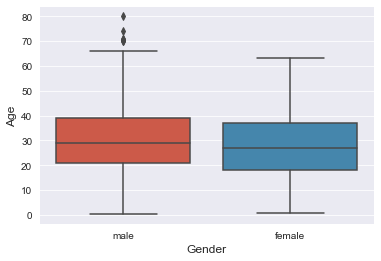

In [28]:
sns.boxplot(x=Train.Gender,y=Train.Age,data=Train)

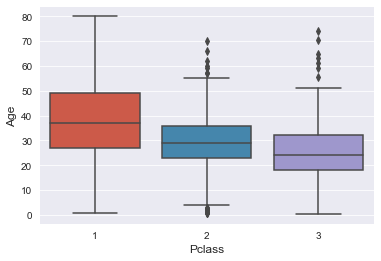

In [29]:
sns.boxplot(x=Train.Pclass,y=Train.Age)

<Figure size 864x576 with 0 Axes>

(array([216.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
        2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ]),
 <a list of 9 Patch objects>)

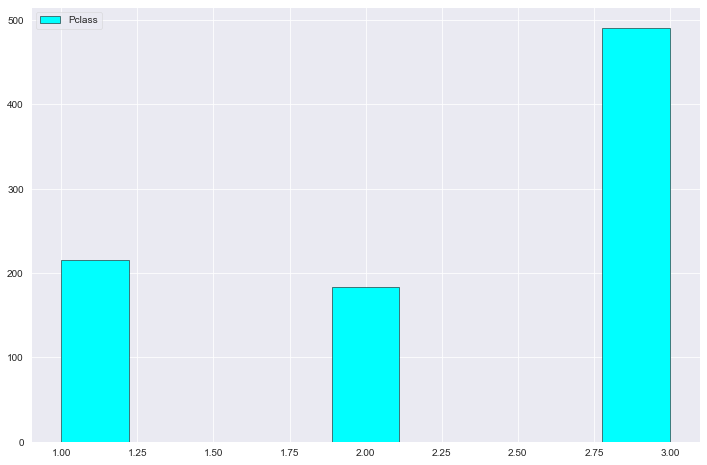

In [30]:
plt.figure(figsize=(12,8))
plt.hist(Train['Pclass'],bins=9,histtype='bar',align='mid',color='cyan',label='Pclass',edgecolor='black')
plt.legend(loc=0)

In [31]:
Train.loc[:,['Pclass','Age']][(Train['Pclass']==1)].mean().round(2)

Pclass     1.00
Age       38.23
dtype: float64

In [32]:
Train.loc[:,['Pclass','Age']][(Train['Pclass']==2)].mean().round(2)

Pclass     2.00
Age       29.88
dtype: float64

In [33]:
Train.loc[:,['Pclass','Age']][(Train['Pclass']==3)].mean().round(2)

Pclass     3.00
Age       25.14
dtype: float64

In [ ]:
sns.pairplot(Train)

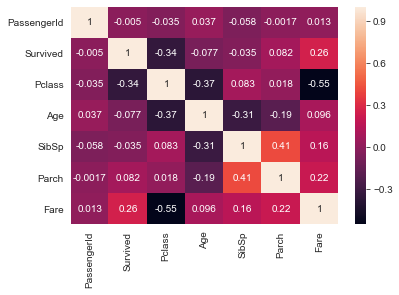

In [76]:
sns.heatmap(Train.corr(),annot=True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2568e7012c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x25688843ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x2568e7011c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x2568e701a88>}

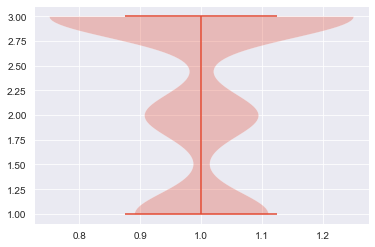

In [78]:
plt.violinplot(Train.Pclass)

In [79]:
from mpl_toolkits.mplot3d import Axes3D

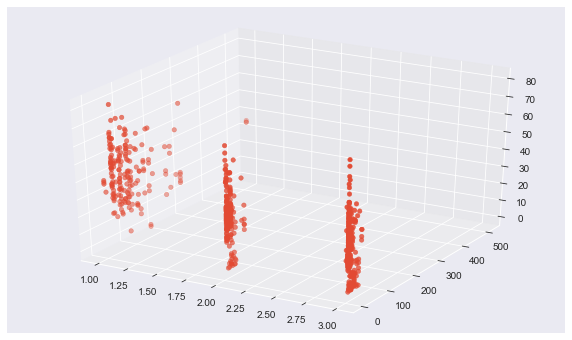

In [84]:
fig=plt.figure(figsize=(10,6))
ax= fig.add_subplot(111,projection='3d')
ax.scatter(Train.Pclass,Train.Fare,Train.Age)


In [25]:
list(Train.Survived.value_counts())

[549, 342]

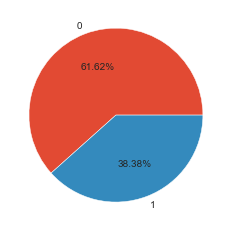

In [26]:
lbl = list(Train.Survived.unique())
values = list(Train.Survived.value_counts())

plt.pie(values, labels=lbl, autopct='%.2f%%');

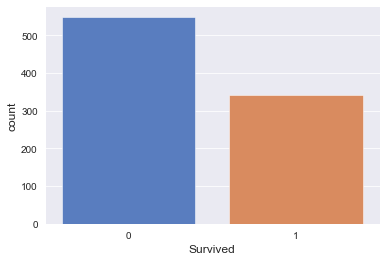

In [27]:
sns.countplot(x='Survived',data=Train,palette='muted');

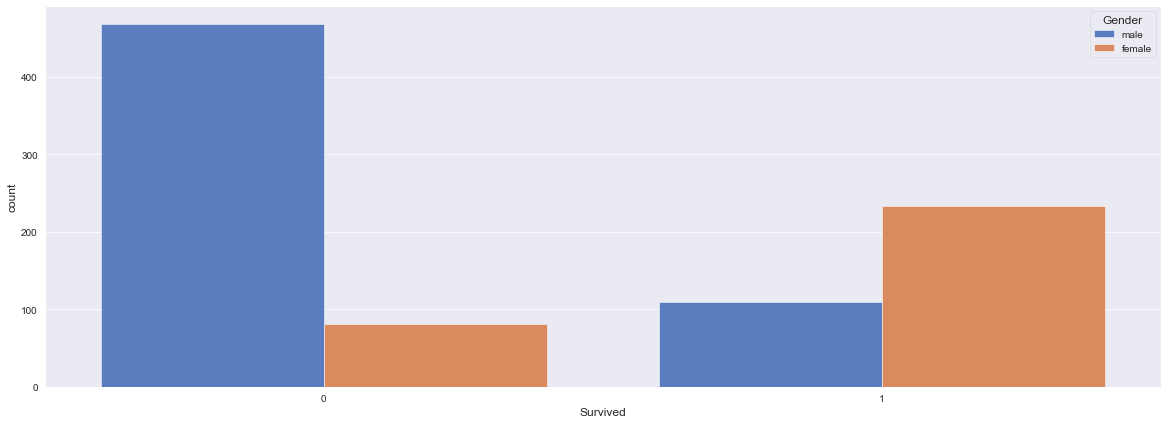

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(x='Survived',hue='Gender',data=Train,palette='muted');

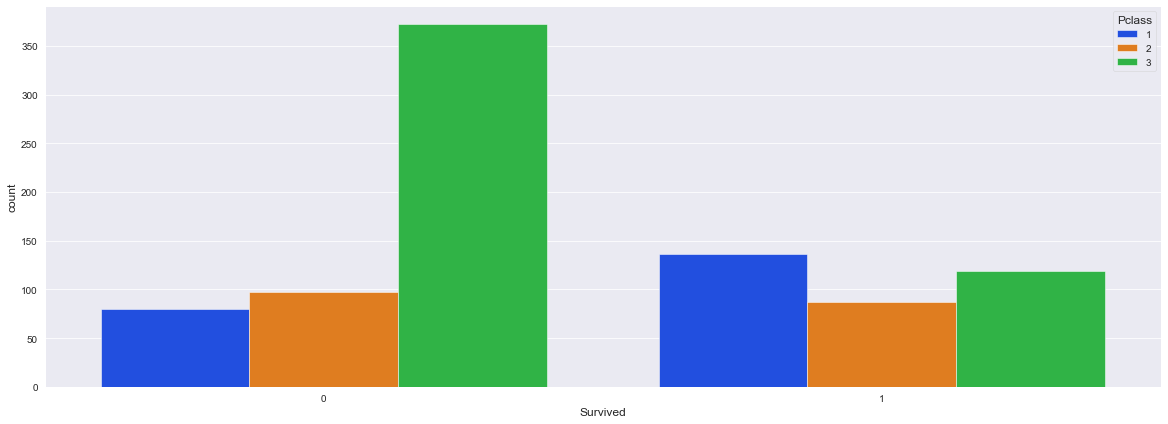

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(x='Survived',hue='Pclass',data=Train,palette='bright');

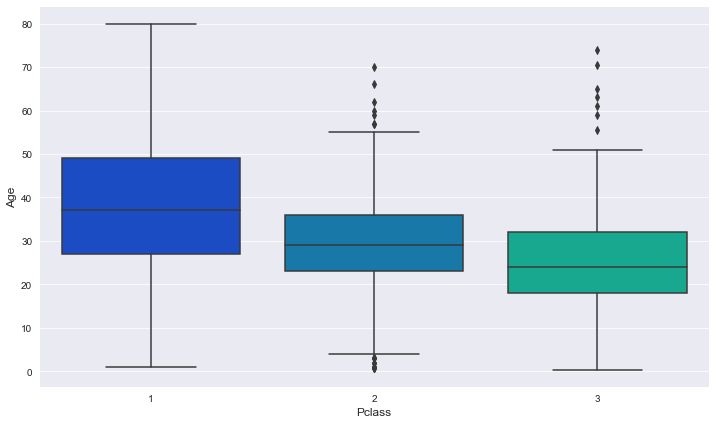

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=Train,palette='winter');


In [32]:
Train.groupby('Pclass')['Age'].transform('mean')

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: Age, Length: 891, dtype: float64

In [33]:
Train['Age'] = Train['Age'].fillna(Train.groupby('Pclass')['Age'].transform('mean'))

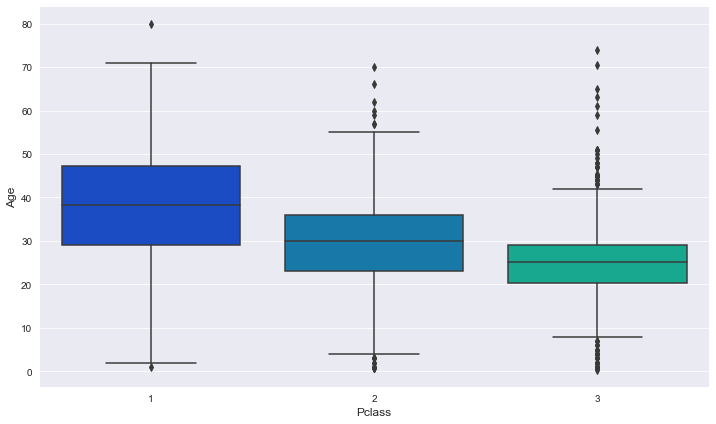

In [34]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=Train,palette='winter');

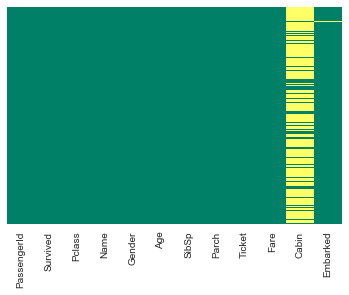

In [35]:
Train.isna().sum(); 
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='summer')
plt.show();

In [37]:
Train.drop('Cabin',axis=1,inplace=True)

In [38]:
Train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [40]:
emb_null = list(Train[Train.Embarked.isnull()].index)

In [41]:
Train.drop(emb_null, axis = 0, inplace=True)

In [42]:
Train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [45]:
Train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
Train.shape

(889, 11)

In [48]:
Train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.032411,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.055278,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.400919,0.081656,0.016824,-0.548193
Age,0.032411,-0.055278,-0.400919,1.000000,-0.242737,-0.174818,0.118050
SibSp,-0.057686,-0.034040,0.081656,-0.242737,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.174818,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.118050,0.160887,0.217532,1.000000


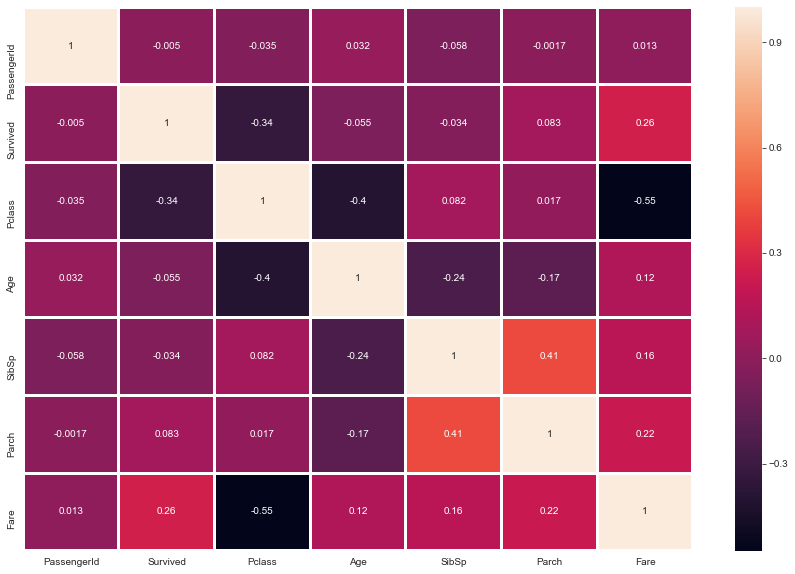

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(Train.corr(),annot=True,linewidths=2);

In [50]:
Train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [52]:
pd.get_dummies(Train['Gender']).head(10)


pd.get_dummies(Train['Gender'],prefix='Gender' ,drop_first=True).head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


,Gender_male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [54]:
Train['Embarked'].unique(); Train['Embarked'].value_counts()

array(['S', 'C', 'Q'], dtype=object)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
pd.get_dummies(Train['Embarked']).head(10)
pd.get_dummies(Train['Embarked'],prefix='Port', drop_first=True).head(10)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


,Port_Q,Port_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [57]:
Gender = pd.get_dummies(Train['Gender'],prefix='Gender',drop_first=True)

In [58]:
type(Gender)

pandas.core.frame.DataFrame

In [59]:
Gender = pd.get_dummies(Train['Gender'],prefix='Gender',drop_first=True)
embark = pd.get_dummies(Train['Embarked'],prefix='Embarked',drop_first=True)

In [60]:
Train = pd.concat([Train,Gender,embark],axis=1)
Train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [61]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Gender_male    0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [62]:
Train.drop(['Gender','Embarked','Name','Ticket'],axis=1,inplace=True)
Train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [63]:
Train.shape

(889, 10)

In [65]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender_male    0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [66]:
Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [67]:
feature_cols = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Gender_male', 'Embarked_Q', 'Embarked_S']

In [68]:
X=Train[feature_cols]
Y=Train['Survived']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, 
                                                    test_size=0.30,random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

# generate predictions
predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
logmodel.intercept_

array([3.52346919])

In [73]:
logmodel.coef_

array([[-0.78544563, -0.02616502, -0.21717006, -0.08743285,  0.00468494,
        -2.32085878, -0.00815135, -0.17358335]])

In [74]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Embarked_Q,Embarked_S
807,3,18.00000,0,0,7.775,0,0,1
651,2,18.00000,0,1,23.000,0,0,1
2,3,26.00000,0,0,7.925,0,0,1
690,1,31.00000,1,0,57.000,1,0,1
196,3,25.14062,0,0,7.750,1,1,0


In [75]:
Y_train.head()

807    0
651    1
2      1
690    1
196    0
Name: Survived, dtype: int64

In [76]:
logmodel.predict(X_train)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [77]:
print(logmodel.predict_proba(X_train)[:,1])

[0.63622202 0.79056672 0.58671128 0.37339886 0.14388695 0.5133893
 0.9855496  0.65392079 0.59172844 0.92427901 0.31701378 0.10397998
 0.31086765 0.11908873 0.10319851 0.14388695 0.11458813 0.13705378
 0.54834881 0.09689076 0.12475812 0.89747753 0.79171168 0.51753793
 0.91229736 0.91530528 0.12442813 0.05591961 0.23128596 0.11834582
 0.51239545 0.09926912 0.59229423 0.46315167 0.20916711 0.14459194
 0.15505539 0.75162131 0.40752026 0.13972432 0.10486452 0.61396419
 0.57686148 0.60225676 0.81006857 0.65780324 0.54277412 0.11152386
 0.93732296 0.1209494  0.14970951 0.1663727  0.79997541 0.13716231
 0.14388695 0.11490506 0.10392727 0.11403851 0.24589389 0.90095248
 0.10643962 0.11914576 0.13409501 0.37444816 0.14433597 0.08874995
 0.26503676 0.9143768  0.58663085 0.15039939 0.14545357 0.21262546
 0.14998277 0.37246781 0.12483703 0.7706417  0.29281291 0.56108158
 0.21995806 0.5641704  0.31496923 0.82696787 0.71602871 0.70295109
 0.14855257 0.66784841 0.92439235 0.16352781 0.83043624 0.73844

In [78]:
np.where(logmodel.predict_proba(X_train)[:,1] > 0.7, 1, 0)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [80]:
from sklearn.metrics import roc_curve,auc,confusion_matrix, \
classification_report,accuracy_score

print(classification_report(Y_train,predictions_train))
print("Accuracy:",accuracy_score(Y_train, predictions_train))

print("---------------------------------------------------------")

print(classification_report(Y_test,predictions_test))
print("Accuracy:",accuracy_score(Y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       386
           1       0.76      0.69      0.72       236

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.78       622
weighted avg       0.80      0.80      0.80       622

Accuracy: 0.8006430868167203
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

Accuracy: 0.8089887640449438


In [82]:
cnf_matrix = confusion_matrix(Y_train,predictions_train)

cm = pd.DataFrame(cnf_matrix) # Calculate Accuracy using the formula 
cm

,0,1
0,336,50
1,74,162


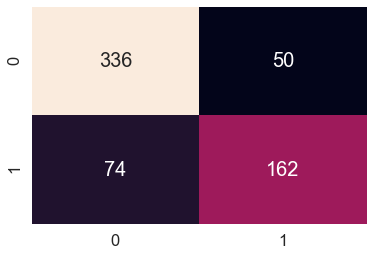

In [83]:
sns.set(font_scale=1.5)#for label size
sns.heatmap(cm,annot=True,fmt='g', annot_kws={"size": 20}, cbar=False)

In [84]:
cnf_matrix1 = confusion_matrix(Y_test,predictions_test)

cm1 = pd.DataFrame(cnf_matrix1) # Calculate Accuracy using the formula 
cm1

,0,1
0,148,15
1,36,68


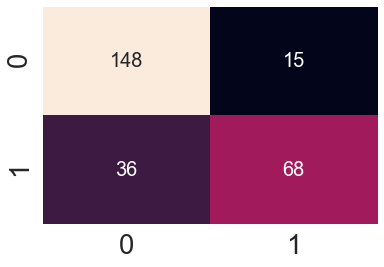

In [85]:
sns.set(font_scale=2.5)#for label size
sns.heatmap(cm1,annot=True,fmt='g', annot_kws={"size": 20}, cbar=False)

In [87]:
FPR, TPR, i = roc_curve(Y_train, predictions_train)

FPR1, TPR1, j = roc_curve(Y_test, predictions_test)

In [88]:
roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )

roc_auc1 = auc(FPR1, TPR1)
print ('ROC AUC: %0.3f' % roc_auc1 )

ROC AUC: 0.778
ROC AUC: 0.781


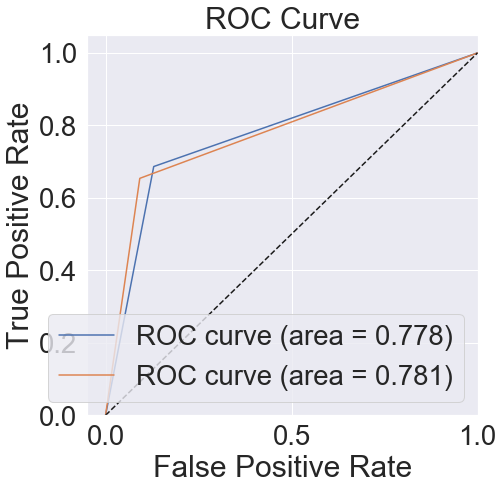

In [90]:
plt.figure(figsize=(7,7))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot(FPR1, TPR1, label='ROC curve (area = %0.3f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show();